<a href="https://colab.research.google.com/github/Aerotycx/2022_ML_Earth_Env_Sci/blob/main/Project_machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hello, this code aims to define the dangerousness of the water of a dataset provided on kaggle under the following link: https://www.kaggle.com/datasets/mssmartypants/water-quality**

Different Import required

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot, aes, geom_line
from google.colab import drive
import statistics
import numpy as np; np.random.seed(1)
import seaborn.apionly as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold

Importing data

In [4]:
drive.mount('/content/drive')
!ls /content/drive/
data = pd.read_csv('/content/drive/MyDrive/projet_ML/waterQuality1.csv',header=0)

Mounted at /content/drive
MyDrive


Modification of the data to make it usable:

In [5]:
for i in data.columns.values.tolist():
  data = data[data[i] != '#NUM!']
  print(i)
print(data)
data['is_safe'] = data['is_safe'].astype(int)

aluminium
ammonia
arsenic
barium
cadmium
chloramine
chromium
copper
flouride
bacteria
viruses
lead
nitrates
nitrites
mercury
perchlorate
radium
selenium
silver
uranium
is_safe
      aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65    9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32   21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01   14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36   11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92   24.33     0.03    0.20    0.006        2.67      0.69   
...         ...     ...      ...     ...      ...         ...       ...   
7994       0.05    7.78     0.00    1.95    0.040        0.10      0.03   
7995       0.05   24.22     0.02    0.59    0.010        0.45      0.02   
7996       0.09    6.85     0.00    0.61    0.030        0.05      0.05   
7997       0.01      10     0.01    2.00    0.000        2.00      0.00   

Breakdown between my parameters of interest and the variable I would like to predict

In [6]:
X= data.drop(['is_safe'], axis=1)
print(X)
y= data['is_safe']
print(y)

      aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65    9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32   21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01   14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36   11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92   24.33     0.03    0.20    0.006        2.67      0.69   
...         ...     ...      ...     ...      ...         ...       ...   
7994       0.05    7.78     0.00    1.95    0.040        0.10      0.03   
7995       0.05   24.22     0.02    0.59    0.010        0.45      0.02   
7996       0.09    6.85     0.00    0.61    0.030        0.05      0.05   
7997       0.01      10     0.01    2.00    0.000        2.00      0.00   
7998       0.04    6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  viruses   lead  nitrates  nitrites  mercury  \
0       0.17      

Data visualisation :

In [7]:
for i in X:
  mean = np.mean(X)
  variance = np.var(X)
  max = np.max(X)
  min = np.min(X)
results = np.array(([[mean],[variance], [max], [min]]))
print(mean,variance,max,min)
print(results)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3721: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


aluminium       0.666396
arsenic         0.161477
barium          1.567928
cadmium         0.042803
chloramine      2.177589
chromium        0.247300
copper          0.805940
flouride        0.771646
bacteria        0.319714
viruses         0.328706
lead            0.099431
nitrates        9.819250
nitrites        1.329846
mercury         0.005193
perchlorate    16.465266
radium          2.920106
selenium        0.049684
silver          0.147811
uranium         0.044672
dtype: float64 aluminium        1.600842
arsenic          0.063815
barium           1.479024
cadmium          0.001299
chloramine       6.589741
chromium         0.073250
copper           0.427133
flouride         0.189570
bacteria         0.108554
viruses          0.142952
lead             0.003383
nitrates        30.709663
nitrites         0.328598
mercury          0.000009
perchlorate    312.855455
radium           5.394749
selenium         0.000828
silver           0.020609
uranium          0.000724
dtype: float64 a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


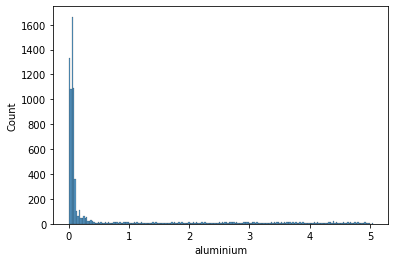

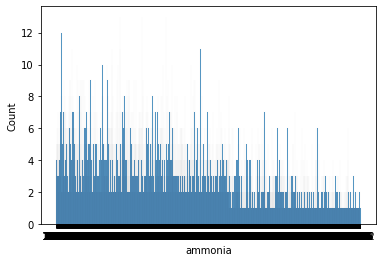

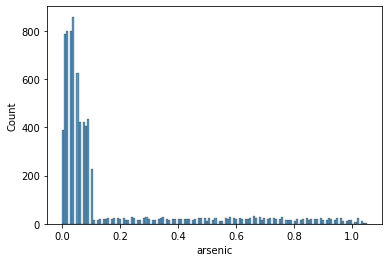

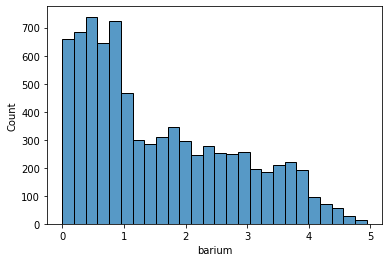

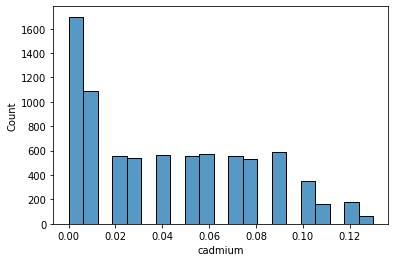

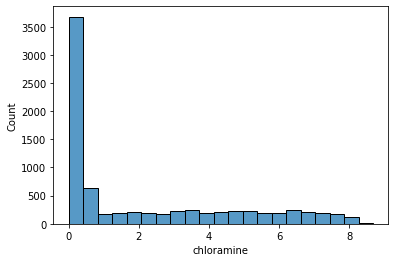

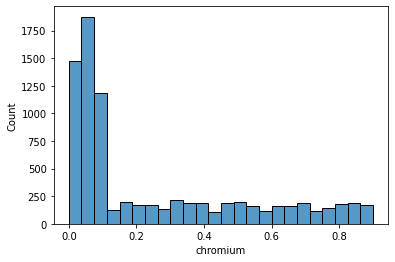

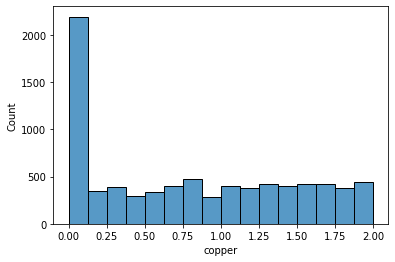

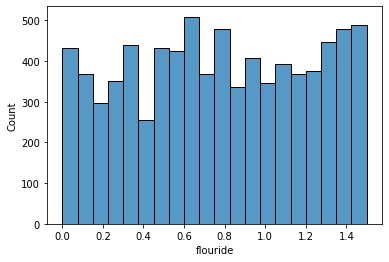

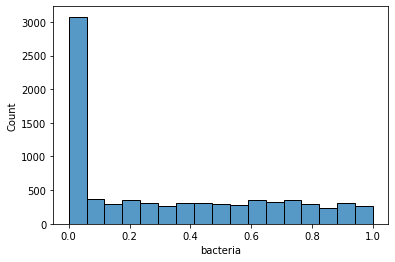

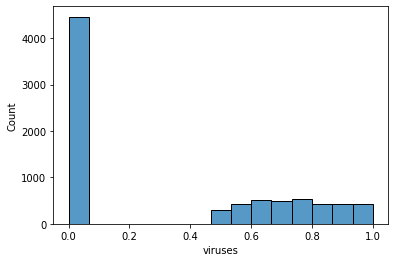

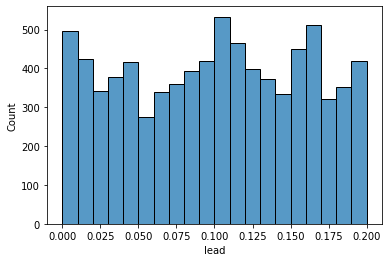

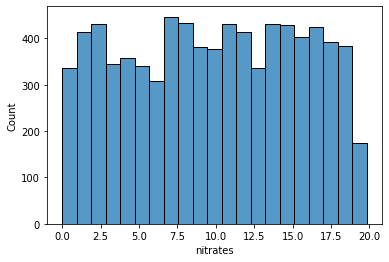

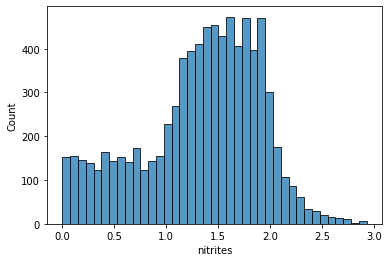

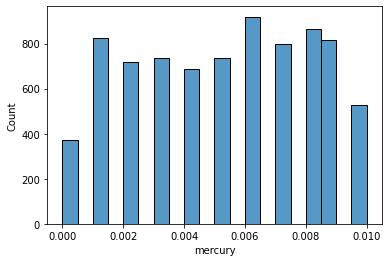

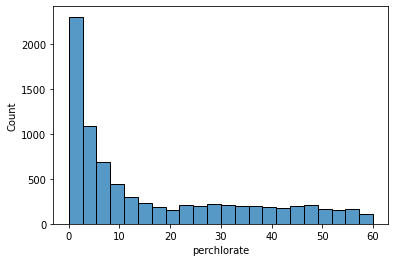

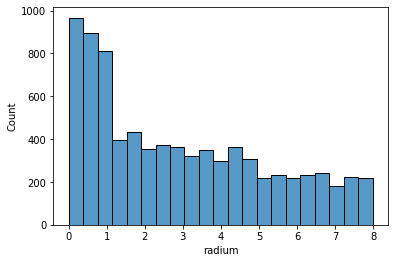

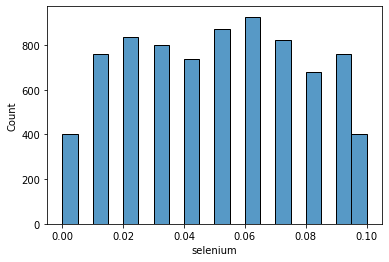

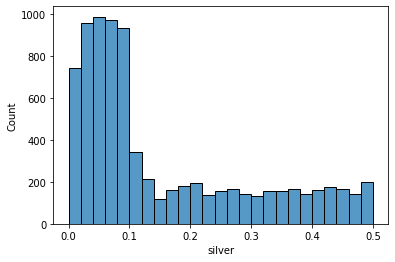

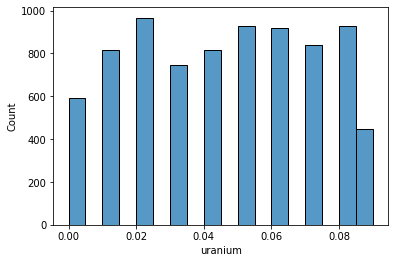

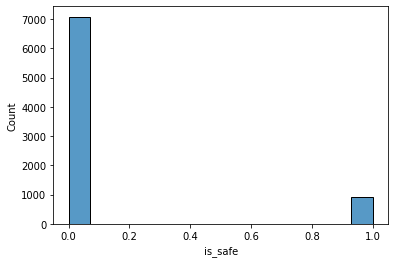

In [8]:
for i in data.columns.values.tolist():
    sns.histplot(data = data, x = i)
    plt.show()

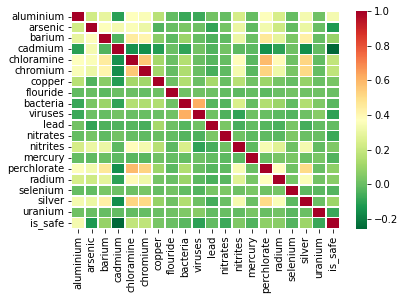

             aluminium   arsenic    barium   cadmium  chloramine  chromium  \
aluminium     1.000000  0.225725  0.294091 -0.099902    0.369221  0.353134   
arsenic       0.225725  1.000000  0.362925  0.334782    0.356509  0.312421   
barium        0.294091  0.362925  1.000000 -0.037901    0.446869  0.415937   
cadmium      -0.099902  0.334782 -0.037901  1.000000   -0.144366 -0.157716   
chloramine    0.369221  0.356509  0.446869 -0.144366    1.000000  0.555846   
chromium      0.353134  0.312421  0.415937 -0.157716    0.555846  1.000000   
copper        0.168569 -0.036488  0.065277 -0.109252    0.118975  0.113003   
flouride     -0.009877  0.003731 -0.018637  0.005005    0.004254 -0.002424   
bacteria     -0.078324  0.035642  0.101304 -0.092133    0.154443  0.141937   
viruses      -0.071040  0.011596 -0.002429  0.021255    0.003432  0.002193   
lead          0.020957 -0.087669 -0.042829 -0.035313   -0.030241 -0.050254   
nitrates     -0.003851  0.027533 -0.011423  0.020232   -0.001619

In [9]:
sns.heatmap(data = data.corr(), linewidths = .5, annot = False, cmap = "RdYlGn_r")
heatmap = plt.show()
print(data.corr())
print(heatmap)

Splitting my data in train, validation and teest

In [10]:
train, validate, test = np.split(data.sample(frac=1), [int(.6*len(data)), int(.8*len(data))])
X_train= train.drop(['is_safe'], axis=1)
y_train= train['is_safe']
X_validate= validate.drop(['is_safe'], axis=1)
y_validate= validate['is_safe']
X_test= test.drop(['is_safe'], axis=1)
y_test= test['is_safe']
print(y)
print(len(X_train))
print(len(X_test))
print(len(X_validate))
print(len(y_train))
print(len(y_test))
print(len(y_validate))

0       1
1       1
2       0
3       1
4       1
       ..
7994    1
7995    1
7996    1
7997    1
7998    1
Name: is_safe, Length: 7996, dtype: int64
4797
1600
1599
4797
1600
1599


Searching for the best Hyperparameters in a logistic reggression

In [14]:
#from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import LogisticRegression
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2','l1','elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_validate, y_validate)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.910155 using {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.909113 (0.014488) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.904321 (0.018243) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.909113 (0.014488) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.910155 (0.015844) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.906823 (0.017753) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.904323 (0.017802) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.907239 (0.018241) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
750 fits failed out of a total of 1350.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solv

Logistic Regression using the best parameters:

In [15]:
logreg = LogisticRegression(C=100,penalty='l1',solver = 'liblinear')
a = logreg.fit(X_train, y_train)
print(a)

LogisticRegression(C=100, penalty='l1', solver='liblinear')


In [16]:
y_pred = logreg.predict(X_test)
print(y_pred)
len(y_pred)

[0 1 0 ... 0 0 0]


1600

Differents Results of this Logistic regression

In [17]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('Accuracy of logistic regression classifier on validate set: {:.2f}'.format(logreg.score(X_validate, y_validate)))
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))

Accuracy of logistic regression classifier on test set: 0.90
Accuracy of logistic regression classifier on validate set: 0.91
Accuracy of logistic regression classifier on train set: 0.90


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[1378   26]
 [ 127   69]]
6298    0
618     1
2381    0
5186    0
4391    0
       ..
7938    0
5192    0
3980    1
235     1
5157    0
Name: is_safe, Length: 1600, dtype: int64


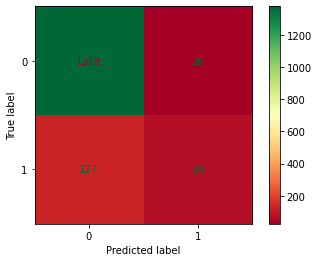

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)
print(y_test)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg,X_test,y_test,cmap="RdYlGn") 

A better visualisation of my confusion matrix

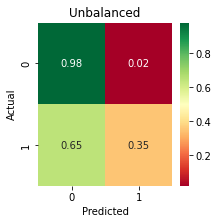

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap="RdYlGn")
plt.title('Unbalanced')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=True)

Making a classification report to see better my results

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1404
           1       0.73      0.35      0.47       196

    accuracy                           0.90      1600
   macro avg       0.82      0.67      0.71      1600
weighted avg       0.89      0.90      0.89      1600



A diffenrent way to see the performance of my ligistic regression

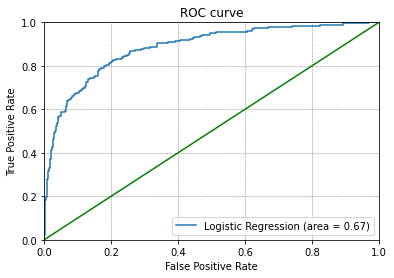

<Figure size 7200x7200 with 0 Axes>

In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier(random_state = 0)

fitt = clf.fit(X_train, y_train)

fitt.predict_proba(X_test)
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'g-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.grid(color='grey',linestyle='--', linewidth=0.5)
plt.figure(figsize = (100, 100))
plt.show()

Oversampling: because my data have a Unbalanced problem

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


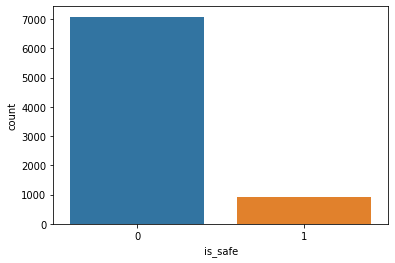

In [22]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
X_resampled
y_resampled
sns.countplot(y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Count of oversampling data')]

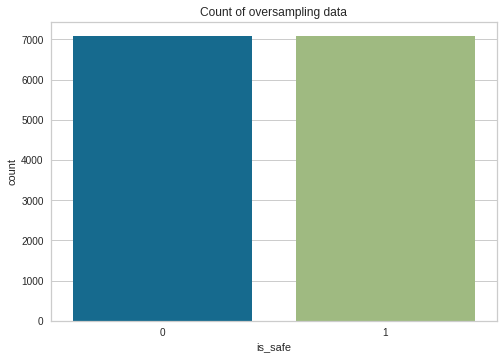

In [61]:
sns.countplot(y_resampled).set(title='Count of oversampling data')

In [24]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

Making a new research of hyperparameter with the oversampled data:

In [25]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2','l1','elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_resampled, y_resampled)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
750 fits failed out of a total of 1350.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solv

Best: 0.792466 using {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.792160 (0.012009) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.772326 (0.012670) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.792230 (0.012095) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.792466 (0.011211) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.791524 (0.012988) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.771879 (0.012054) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.791618 (0.012982) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

I see the bests hyperparameter are the same as before.

In [26]:
logreg2 = LogisticRegression(C=100,penalty='l1',solver = 'liblinear')
b = logreg2.fit(X_train_resampled, y_train_resampled)

In [27]:
y_pred_resampled = logreg2.predict(X_test_resampled)

Results on the oversampled data

In [28]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg2.score(X_test_resampled, y_test_resampled)))
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg2.score(X_train_resampled, y_train_resampled)))

Accuracy of logistic regression classifier on test set: 0.80
Accuracy of logistic regression classifier on train set: 0.79


In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix_resampled = confusion_matrix(y_test_resampled,y_pred_resampled)
print(confusion_matrix_resampled)

[[1136  245]
 [ 325 1128]]


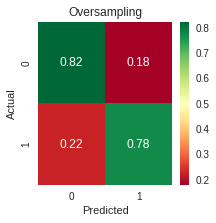

In [63]:
cm = confusion_matrix(y_test_resampled, y_pred_resampled)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap="RdYlGn")
plt.title('Oversampling')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=True)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test_resampled, y_pred_resampled))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1381
           1       0.82      0.78      0.80      1453

    accuracy                           0.80      2834
   macro avg       0.80      0.80      0.80      2834
weighted avg       0.80      0.80      0.80      2834



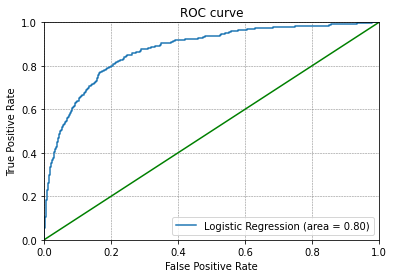

<Figure size 7200x7200 with 0 Axes>

In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_resampled, y_pred_resampled)
fpr, tpr, thresholds = roc_curve(y_test_resampled, logreg2.predict_proba(X_test_resampled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'g-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.grid(color='grey',linestyle='--', linewidth=0.5)
plt.figure(figsize = (100, 100))
plt.show()

Undersampling: verification another example 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Count of undersampling data')]

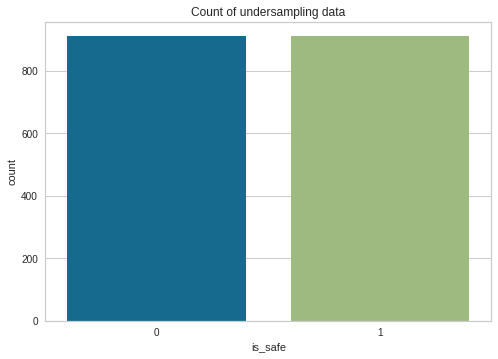

In [62]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_under, y_under = rus.fit_resample(X, y)
X_under
y_under
sns.countplot(y_under).set(title='Count of undersampling data')

In [34]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.2, random_state=0)

In [35]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2','l1','elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_under, y_under)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.778161 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.778161 (0.034141) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.754216 (0.027168) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.777796 (0.034052) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.776147 (0.034873) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.775405 (0.031593) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.757324 (0.027437) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.775040 (0.031622) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
750 fits failed out of a total of 1350.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solv

We have a change in the hyperparameter to use:

In [36]:
logreg3 = LogisticRegression(C=100,penalty='l2',solver = 'newton-cg')
c = logreg3.fit(X_train_under, y_train_under)

In [37]:
y_pred_under = logreg3.predict(X_test_under)

In [38]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg3.score(X_test_under, y_test_under)))
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg3.score(X_train_under, y_train_under)))

Accuracy of logistic regression classifier on test set: 0.76
Accuracy of logistic regression classifier on train set: 0.79


In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix_under= confusion_matrix(y_test_under,y_pred_under)
print(confusion_matrix_under)

[[140  41]
 [ 46 138]]


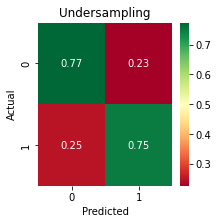

In [40]:
cm = confusion_matrix(y_test_under, y_pred_under)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap="RdYlGn")
plt.title('Undersampling')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=True)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test_under, y_pred_under))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       181
           1       0.77      0.75      0.76       184

    accuracy                           0.76       365
   macro avg       0.76      0.76      0.76       365
weighted avg       0.76      0.76      0.76       365



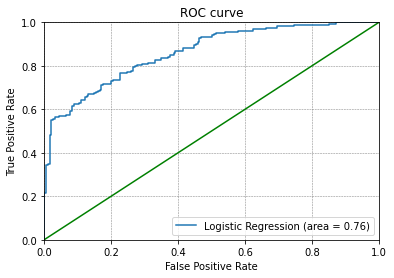

<Figure size 7200x7200 with 0 Axes>

In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_under, y_pred_under)
fpr, tpr, thresholds = roc_curve(y_test_under, logreg3.predict_proba(X_test_under)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'g-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.grid(color='grey',linestyle='--', linewidth=0.5)
plt.figure(figsize = (100, 100))
plt.show()

Comparaison between the three case


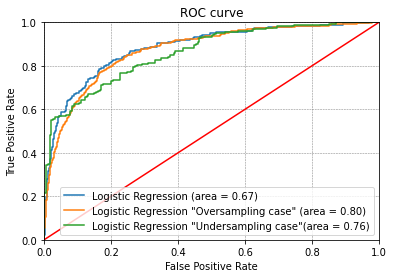

<Figure size 10800x10800 with 0 Axes>

In [43]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc1 = roc_auc_score(y_test, y_pred)
fpr1, tpr1, thresholds1 = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

logit_roc_auc2 = roc_auc_score(y_test_resampled, y_pred_resampled)
fpr2, tpr2, thresholds2 = roc_curve(y_test_resampled, logreg2.predict_proba(X_test_resampled)[:,1])

logit_roc_auc3 = roc_auc_score(y_test_under, y_pred_under)
fpr3, tpr3, thresholds3 = roc_curve(y_test_under, logreg3.predict_proba(X_test_under)[:,1])
plt.figure()
plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % logit_roc_auc1)
plt.plot(fpr2, tpr2, label='Logistic Regression "Oversampling case" (area = %0.2f)' % logit_roc_auc2)
plt.plot(fpr3, tpr3, label='Logistic Regression "Undersampling case"(area = %0.2f)' % logit_roc_auc3)
plt.plot([0, 1], [0, 1],'r-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.grid(color='grey',linestyle='--', linewidth=0.5)
plt.figure(figsize = (150, 150))
plt.show()

For improve my discussion, i will make a second model, The random forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, rfc_predict))
print(classification_report(y_test, rfc_predict))

[[1395    9]
 [  60  136]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1404
           1       0.94      0.69      0.80       196

    accuracy                           0.96      1600
   macro avg       0.95      0.84      0.89      1600
weighted avg       0.96      0.96      0.95      1600



In [46]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)

I make a Feature importance to know which variable are the most important to define if the water is safe or not.

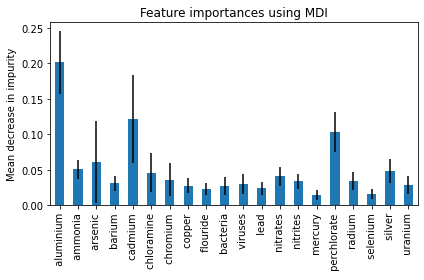

In [47]:
#import pandas as pd
feature_names = [f" {i}" for i in data.columns.values.tolist()[:-1]]
forest_importances = pd.Series(importances,index= feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

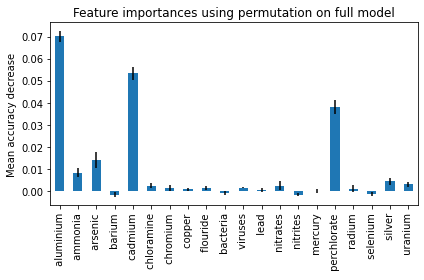

In [48]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rfc, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Running the Hyperparameter for best precision

In [49]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_validate, y_validate)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.937666 using {'max_features': 'log2', 'n_estimators': 1000}
0.922450 (0.014496) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.935787 (0.012322) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.937041 (0.013513) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.928079 (0.014690) with: {'max_features': 'log2', 'n_estimators': 10}
0.934540 (0.013587) with: {'max_features': 'log2', 'n_estimators': 100}
0.937666 (0.013178) with: {'max_features': 'log2', 'n_estimators': 1000}


In [50]:
# random forest model creation
rfc_best = RandomForestClassifier(max_features = 'log2', n_estimators =1000)
rfc_best.fit(X_train,y_train)
# predictions
rfc_predict_best = rfc_best.predict(X_test)

In [51]:
print("Confusion Matrix")
print(confusion_matrix(y_test, rfc_predict_best))

print("Classification Report ")
print(classification_report(y_test, rfc_predict_best))


Confusion Matrix
[[1395    9]
 [  53  143]]
Classification Report 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1404
           1       0.94      0.73      0.82       196

    accuracy                           0.96      1600
   macro avg       0.95      0.86      0.90      1600
weighted avg       0.96      0.96      0.96      1600



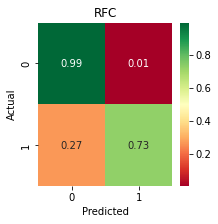

In [52]:
cm = confusion_matrix(y_test, rfc_predict_best)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap="RdYlGn")
plt.title('RFC')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=True)

With the Data oversampled:

In [53]:
# predictions
rfc_predict_best_resampled = rfc_best.predict(X_test_resampled)

In [54]:
print("Confusion Matrix")
print(confusion_matrix(y_test_resampled, rfc_predict_best_resampled))
print("Classification Report")
print(classification_report(y_test_resampled, rfc_predict_best_resampled))


Confusion Matrix
[[1381    0]
 [ 195 1258]]
Classification Report
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      1381
           1       1.00      0.87      0.93      1453

    accuracy                           0.93      2834
   macro avg       0.94      0.93      0.93      2834
weighted avg       0.94      0.93      0.93      2834



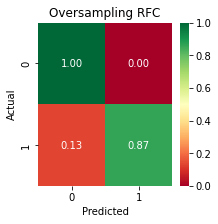

In [55]:
cm = confusion_matrix(y_test_resampled, rfc_predict_best_resampled)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap="RdYlGn")
plt.title('Oversampling RFC')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=True)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


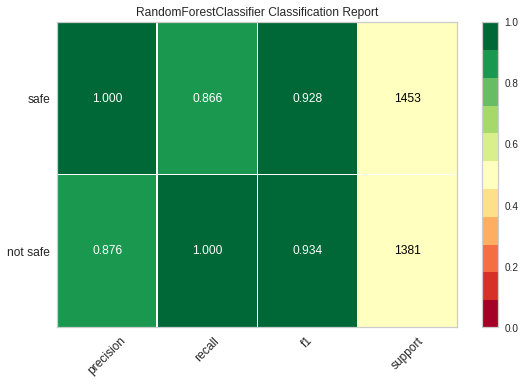

ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6f23828d0>,
                     classes=['not safe', 'safe'],
                     cmap=<matplotlib.colors.ListedColormap object at 0x7fe6f1fa0c10>,
                     estimator=RandomForestClassifier(max_features='log2',
                                                      n_estimators=1000),
                     support=True)

In [56]:
from yellowbrick.classifier import classification_report


# Specify the target classes
classes = ["not safe", "safe"]


# Instantiate the visualizer
classification_report(
    rfc_best, X_train_resampled, y_train_resampled, X_test_resampled, y_test_resampled,classes = classes, support=True,cmap="RdYlGn")

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


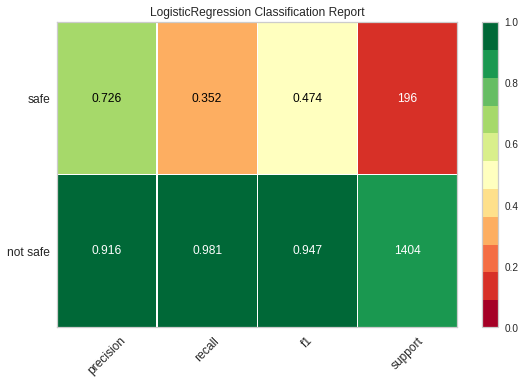

ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6f2050a10>,
                     classes=['not safe', 'safe'],
                     cmap=<matplotlib.colors.ListedColormap object at 0x7fe6f20509d0>,
                     estimator=LogisticRegression(C=100, penalty='l1',
                                                  solver='liblinear'),
                     support=True)

In [57]:
classification_report(
    logreg, X_train, y_train, X_test, y_test,classes = classes, support=True,cmap="RdYlGn")